In [ ]:
#PRATIKSHA172
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
df = pd.read_csv('/content/Breast_cancer_data (1).csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


## **Basic EDA**

<Axes: >

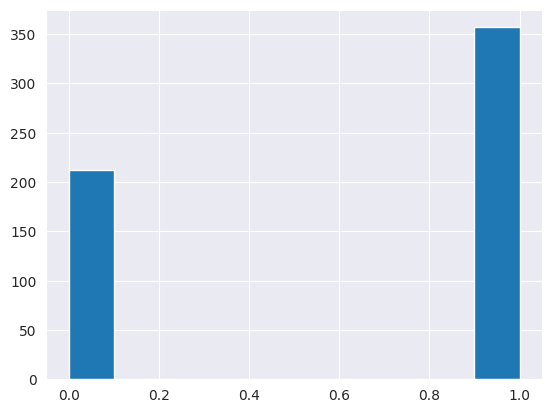

In [ ]:
df["diagnosis"].hist()

### **Correlation Heatmap before dropping columns**

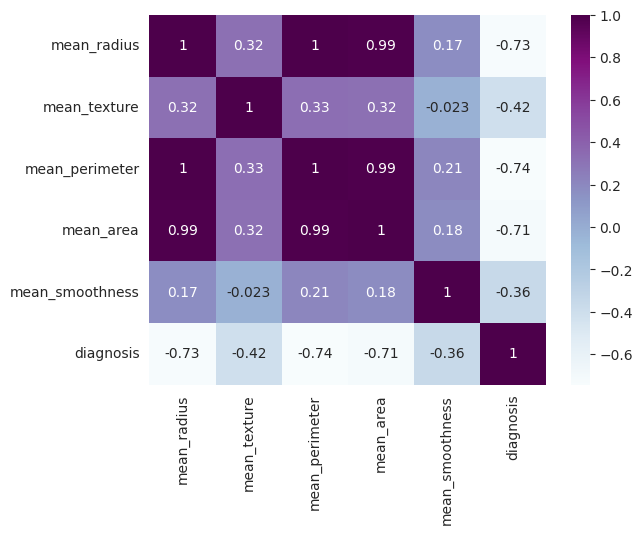

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.show()

### **Dropping columns `mean_perimeter` , `mean_area`**

- They are highly correlated and even radius is highly correlated with the both of them.

In [ ]:
df.drop(['mean_perimeter','mean_area'],axis=1,inplace=True)

### **Correlation Heatmap after dropping columns**

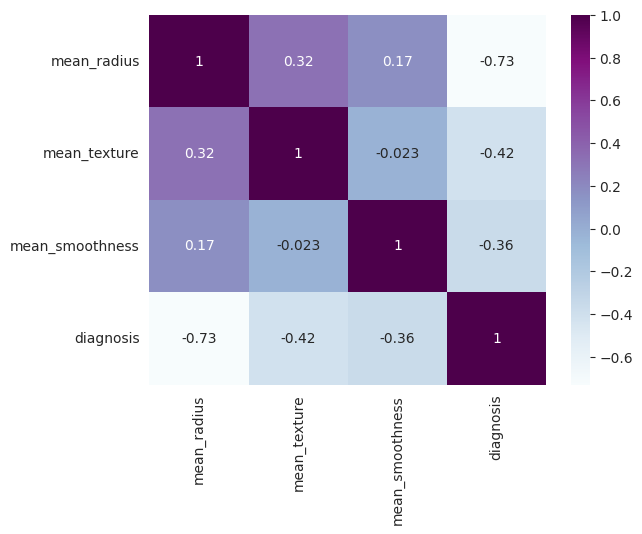

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.show()

### **Histogram of the remaining features**

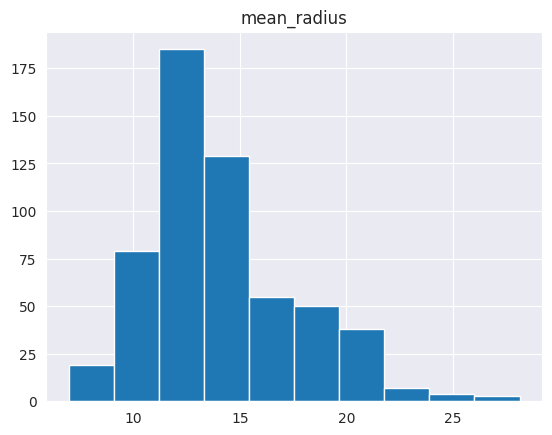

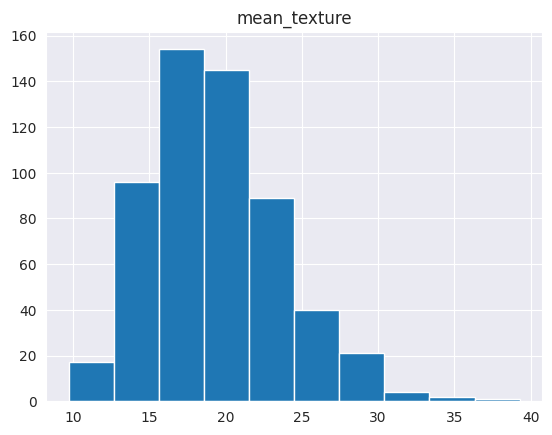

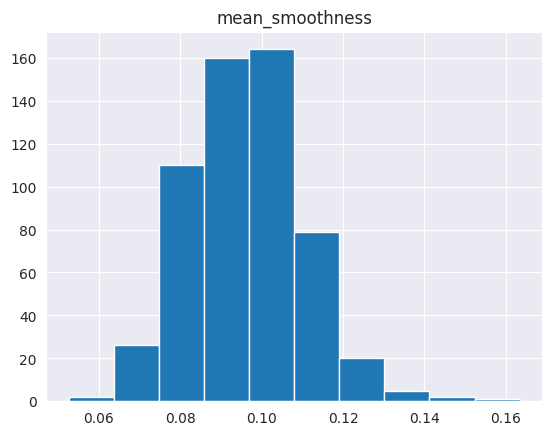

In [ ]:
for i in df.columns:
  if i != 'diagnosis':
    plt.title(i)
    plt.hist(df[i])
    plt.show()

### **Distribution of the remaining features in the dataset**

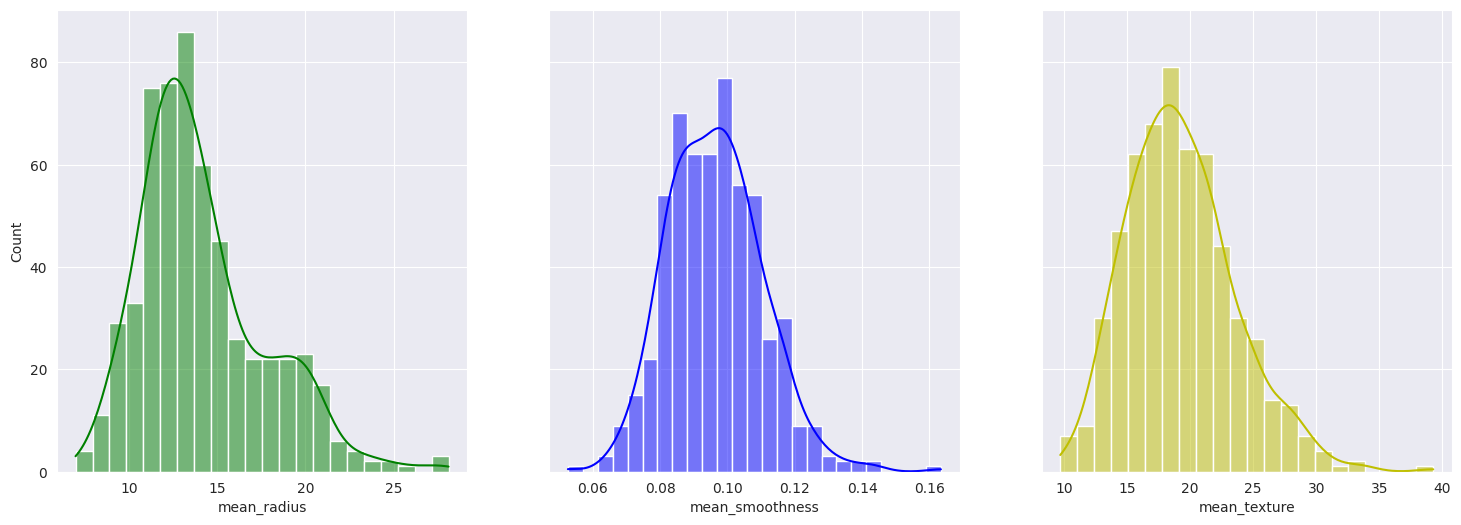

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="mean_radius", kde=True, color='g')
sns.histplot(df, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(df, ax=axes[2], x="mean_texture", kde=True, color='y');

## **Test Gaussian Model**

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=42)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))

[[39  4]
 [ 2 69]]


# **Using sklearn library fit a Naïve Bayes classifier on Dataset 2 and Dataset 3.**

# **Dataset 2**

## **Loading the Dataset**

In [ ]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## **Label Encoding Gender column**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = data.drop('Purchased',axis=1)
y = data['Purchased']
X["Gender"] = le.fit_transform(X["Gender"])

In [ ]:
X.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000


## **Making training and testing splits**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.19424348, -1.        , -1.06675246, -0.38634438],
       [ 0.21592346,  1.        ,  0.79753468, -1.22993871],
       [ 0.64683448, -1.        ,  0.11069205,  1.853544  ],
       ...,
       [-0.11569962, -1.        ,  0.50317355,  1.82445454],
       [-1.52869143,  1.        ,  0.11069205,  0.19544481],
       [-1.45447944, -1.        , -0.57615058,  0.45724994]])

In [ ]:
X_test.shape

(80, 4)

## **Fitting and Evaluating the model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_preds))


Confusion Matrix:

[[49  3]
 [ 4 24]]


In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_preds))


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.89      0.86      0.87        28

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



# **Dataset 3**

## **Loading the Dataset**

In [ ]:
credit = pd.read_csv('/content/german_credit_data.csv')
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## **Label Encoding and Handling Missing Values**

- Filling missing values with the mode helps preserve the distribution of categorical variables. It ensures that the overall pattern and characteristics of the data remain similar before and after the imputation.

In [ ]:
# Fill missing values with the most frequent value in each column
credit["Saving accounts"].fillna(credit["Saving accounts"].mode()[0], inplace=True)
credit["Checking account"].fillna(credit["Checking account"].mode()[0], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

for col in categorical_columns:
    le = LabelEncoder()
    credit[col] = le.fit_transform(credit[col])
    label_encoders[col] = le

credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,0,0,1169,6,5,1
1,1,22,0,2,1,0,1,5951,48,5,0
2,2,49,1,1,1,0,0,2096,12,3,1
3,3,45,1,2,0,0,0,7882,42,4,1
4,4,53,1,2,0,0,0,4870,24,1,0


## **Making training and testing splits**

In [ ]:
X_credit = credit.drop('Risk',axis=1)
y_credit = credit['Risk']

X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size=0.2, random_state=42)

## **Feature Scaling**

In [ ]:
sc = StandardScaler()
X_train_credit = sc.fit_transform(X_train_credit)
X_test_credit = sc.transform(X_test_credit)

X_train_credit
X_test_credit.shape


(200, 10)

## **Fitting and Evaluating the model**

In [ ]:
model_credit = GaussianNB()
model_credit.fit(X_train_credit, y_train_credit)

y_preds_credit = model_credit.predict(X_test_credit)

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test_credit, y_preds_credit))
print("\nClassification Report:\n")
print(classification_report(y_test_credit, y_preds_credit))


Confusion Matrix:

[[ 14  45]
 [ 21 120]]

Classification Report:

              precision    recall  f1-score   support

           0       0.40      0.24      0.30        59
           1       0.73      0.85      0.78       141

    accuracy                           0.67       200
   macro avg       0.56      0.54      0.54       200
weighted avg       0.63      0.67      0.64       200

